# <center><div class="alert alert-block alert-info">Analysis on Boston housing prices with Boston Housing dataset</div></center>

<center><div class="alert alert-block alert-success">AT THE END IS A DEBUTE OF MACHINE LEARNING THAT WILL BE IMPROVE LATER</div><center>

### Importing packages

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.impute import SimpleImputer


### Extracting data into DataFrame

In [2]:

data = pd.read_excel('BostonHousingData.xlsx')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# 1. Exploratory Data Analysis (EDA)

### Description of the features in the dataset and their potential impact on housing prices
From the details about the data we have the following description of the features:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

From the above description, potential features that may have an impact on housing prices will be CRIM, CHAS, NOX, RM, RAD, TAX, B

### Data Inspection and Cleaning

In [3]:
# Verifying the dimension of the data
data.shape

(506, 14)

In [4]:
# Descriptive statistics of the data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The above DataFrame give us statistic values of our data. We will see the graphical representation of these values later with a box plot

In [5]:
# Summary of the data (index dtype and columns, non-null values, and memory usage)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


From the above summary we can see that some columns are missing values as their non-null count is less than 506 (total number of entries)

In [6]:
# Count of missing values per columns
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

The above summary informs us that the missing values columns are missing `20` values each

In [7]:
# Recuparating columns with missing values in a list
miss_val_cols = [col for col in data.columns if data[col].isna().any()]
miss_val_cols

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [8]:
# Checking for duplicate entries
data.duplicated().sum()

0

There are no duplicated entries in our data

### Visualization of features distribution

#### Box Plot
This will help us identify the existence of outliers in our data

<Axes: >

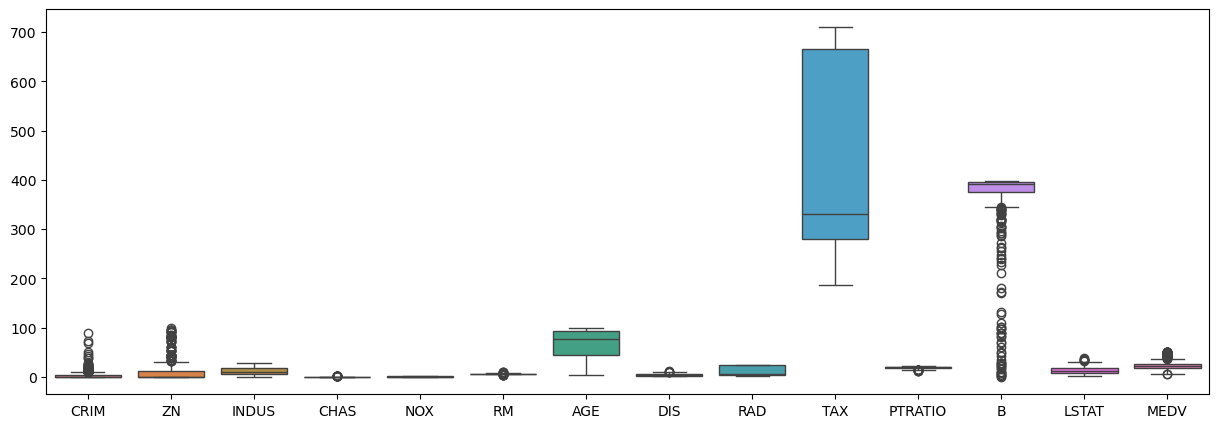

In [9]:
# Plotting the features
plt.figure(figsize=(15, 5))
sns.boxplot(data=data)

From the above figure, features suffering the most with outliers are `CRIM`, `ZN`, `B`

#### Handling missing values
Since the data contains outlier, we will fill in missing values with the median value (recommended in presence of outliers)

In [10]:
''' Using Simple imputation methode to fill in missing values with the median'''
# Instantiating the SimpleImputer class
s_imputer = SimpleImputer(strategy='median')

# Fit and transforming the data
imputed_df = pd.DataFrame(s_imputer.fit_transform(data))

# Resetting the columns removed by the imputation methode
imputed_df.columns = data.columns

# Imputation methode convert data type to all float, resetting to original data type
int_cols = data.select_dtypes('int64').columns
imputed_df[int_cols] = imputed_df[int_cols].astype('int64')

# Checking missing value
imputed_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

As we can see we have no more missing values in our data 

#### Handling outliers

In [11]:
# Grouping columns with no outliers and columns with outliers sperately
column = imputed_df.columns.tolist()

cols_w_outl = ['CRIM', 'ZN', 'B']

cols_wl_outl = imputed_df.drop(columns=cols_w_outl).columns.tolist()

<Axes: >

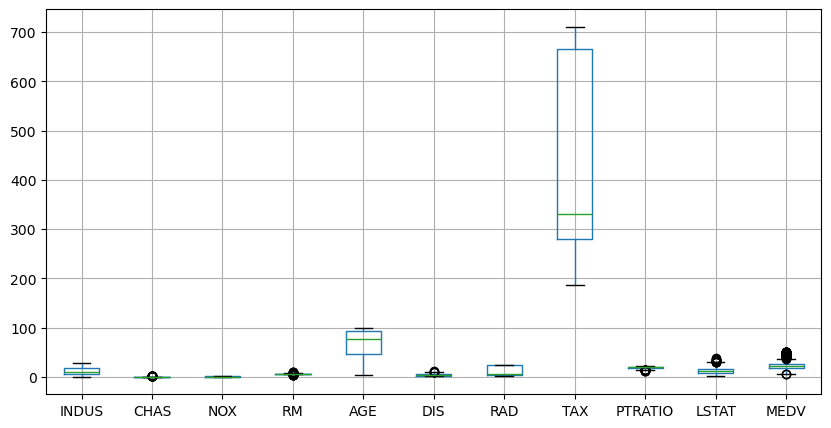

In [12]:
# Box plot of colunms with no outliers
imputed_df.boxplot(column=cols_wl_outl, figsize=(10, 5))

<Axes: >

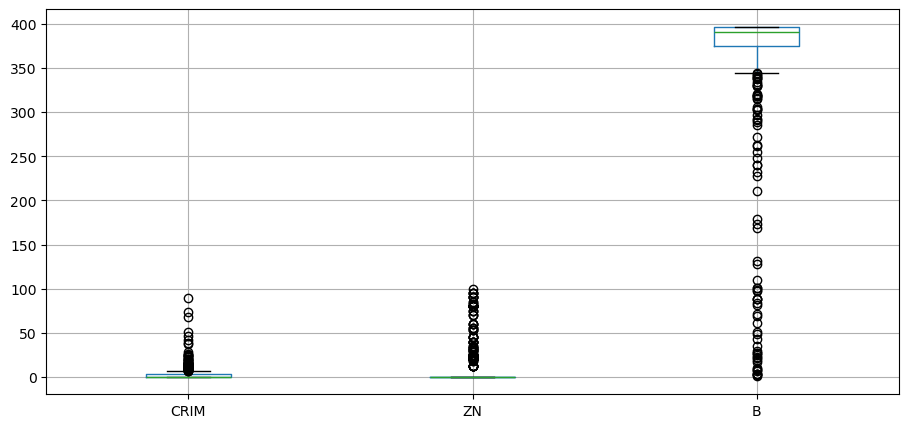

In [13]:
# Box plot of colunms with outliers
imputed_df.boxplot(column=cols_w_outl, figsize=(11, 5))

Transforming outliers:
here we will use the Interquartile Range (IQR) methode to transform the outliers
- `IQR` = `Q3` - `Q1` where `Q3` is the `75th` percentile of the data and `Q1` the `25th` percentile
- `Min` = `Q1` - (`1.5` * `IQR` )
- `Max` = `Q3` + (`1.5` * `IQR`)

In [14]:
# Defining a function to transform outliers
# def transform_outliers(col):
#     # Calculating Q1, Q3, IQR, Min, and Max
#     q1, q3 = imputed_df[col].quantile(q=[.25, .75])
#     iqr = q3 - q1
#     min_val = q1 - (1.5 * iqr)
#     max_val = q3 + (1.5 * iqr)

#     # Transforming the column
#     imputed_df[col] = np.where(imputed_df[col]<min_val, min_val, imputed_df[col])
#     imputed_df[col] = np.where(imputed_df[col]>max_val, max_val, imputed_df[col])

In [15]:
# # Calling the function on the dataset
# for col in cols_w_outl:
#     transform_outliers(col)


<div class="alert alert-block alert-warning">My outliers transformation is yielding error with <b>ZN</b> values all set to <b>0</b> and thus the correlation DataFrame filled with <b>NaN</b> values<br>
For <b>CHAS</b> as well<br> We will go with dropping outliers for now</div> 

Dropping outliers

In [25]:
# Looping through the desired columns
for col in cols_w_outl:
    # Calculating Q1, Q3, IQR, Min, and Max
    q1, q3 = imputed_df[col].quantile(q=[.25, .75])
    iqr = q3 - q1
    min_val = q1 - (1.5 * iqr)
    max_val = q3 + (1.5 * iqr)
    
    imputed_wn_outl_df = imputed_df[(imputed_df[col]>=min_val) & (imputed_df[col]<=max_val)]
imputed_wn_outl_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [89]:
# Checking back the description of our new dataset
imputed_wn_outl_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,2.369029,12.515152,9.892121,0.072261,0.534272,6.344159,65.158508,4.078513,8.088578,377.256410,18.319347,388.705711,11.505082,23.896037
std,7.045691,24.304059,6.450418,0.259222,0.106822,0.705536,27.877756,2.124844,7.774664,154.472057,2.135311,11.180955,6.480900,9.100208
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,344.910000,1.730000,5.000000
25%,0.069050,0.000000,4.930000,0.000000,0.445000,5.920000,41.100000,2.355200,4.000000,276.000000,17.000000,385.910000,6.650000,18.700000
50%,0.191330,0.000000,8.140000,0.000000,0.510000,6.232000,71.000000,3.651900,5.000000,307.000000,18.600000,393.250000,10.290000,22.000000
75%,0.790410,20.000000,18.100000,0.000000,0.605000,6.678000,91.300000,5.450900,7.000000,430.000000,20.200000,396.900000,14.670000,27.500000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

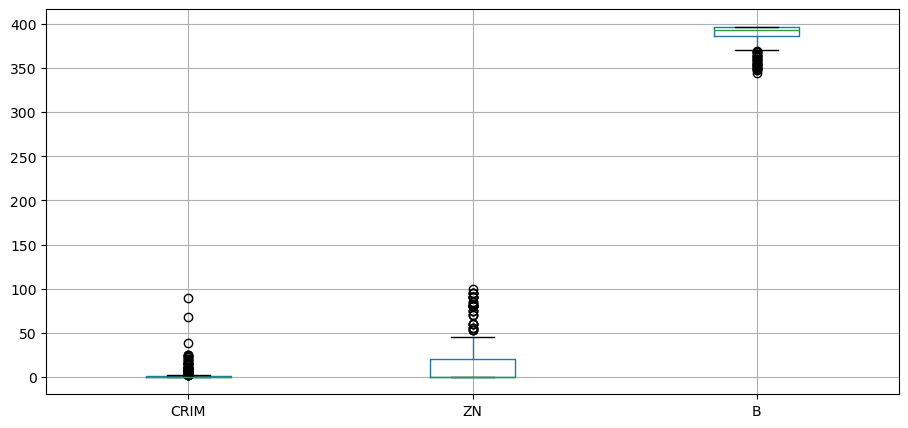

In [17]:
# Box plot of colunms with outliers to verify our transformation
imputed_wn_outl_df.boxplot(column=cols_w_outl, figsize=(11, 5))

Our dataset still have outliers, but them will have a reduce impact on our analysis

From the box plots we can observe an irregularity between the values of the features (B: proportion of blacks by town, TAX: full-value property-tax rate per $10,000) which may need scaling

### Analyzing the relationship between features

In [34]:
# Correlation DataFrame
corr_df = imputed_wn_outl_df.corr()
corr_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.166948,0.380120,-0.027713,0.428356,-0.173849,0.318483,-0.338295,0.600600,0.554681,0.248067,-0.022233,0.398110,-0.332792
ZN,-0.166948,1.000000,-0.487414,-0.043750,-0.493715,0.304695,-0.523950,0.612554,-0.270208,-0.259383,-0.413399,0.084467,-0.390690,0.334025
INDUS,0.380120,-0.487414,1.000000,0.078242,0.713653,-0.353036,0.572194,-0.653722,0.573427,0.680783,0.432711,-0.146534,0.524591,-0.406312
CHAS,-0.027713,-0.043750,0.078242,1.000000,0.083488,0.101870,0.102260,-0.115793,0.064057,0.012373,-0.061205,-0.069486,-0.005128,0.178007
NOX,0.428356,-0.493715,0.713653,0.083488,1.000000,-0.274416,0.714142,-0.766502,0.627762,0.665596,0.232627,-0.167082,0.554134,-0.343677
RM,-0.173849,0.304695,-0.353036,0.101870,-0.274416,1.000000,-0.201195,0.153431,-0.193587,-0.268569,-0.396388,0.047619,-0.643618,0.744178
AGE,0.318483,-0.523950,0.572194,0.102260,0.714142,-0.201195,1.000000,-0.706127,0.415924,0.449411,0.263695,-0.078187,0.553059,-0.313334
DIS,-0.338295,0.612554,-0.653722,-0.115793,-0.766502,0.153431,-0.706127,1.000000,-0.446448,-0.467745,-0.229705,0.076702,-0.436692,0.157172
RAD,0.600600,-0.270208,0.573427,0.064057,0.627762,-0.193587,0.415924,-0.446448,1.000000,0.895641,0.408067,-0.133338,0.378254,-0.286140
TAX,0.554681,-0.259383,0.680783,0.012373,0.665596,-0.268569,0.449411,-0.467745,0.895641,1.000000,0.422847,-0.148727,0.432217,-0.376263


<Axes: >

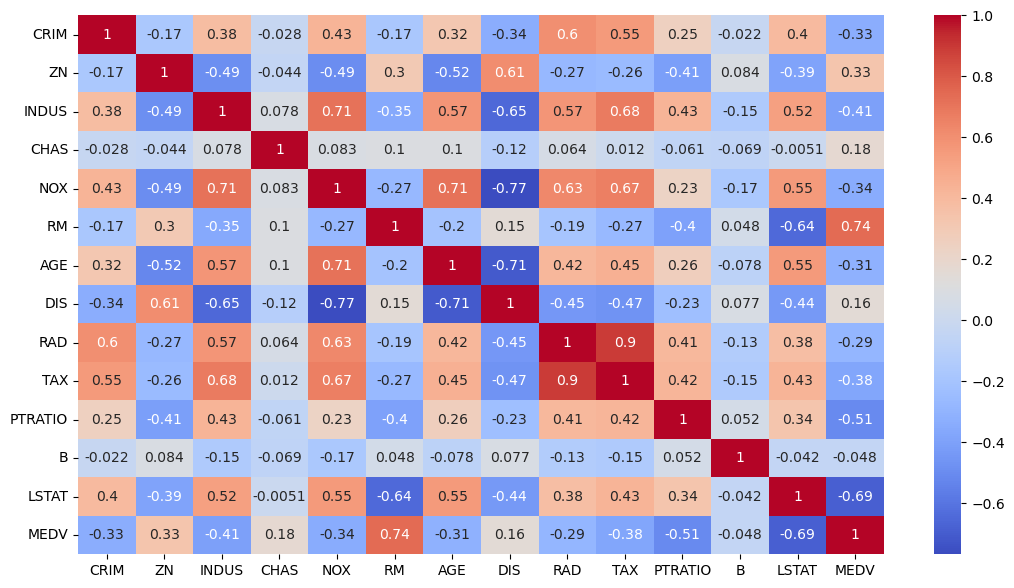

In [24]:
# Color-encoded correlation DataFrame with values in cells
plt.figure(figsize=(13, 7))
sns.heatmap(data=corr_df, annot=True, cmap='coolwarm')

From the above heatmap we can see that quite a few of features have strong correlation to each other regardeless positive or negative.

But since what interest us is their relationship with the target variable, let's plot that for a more clear vew

<Axes: >

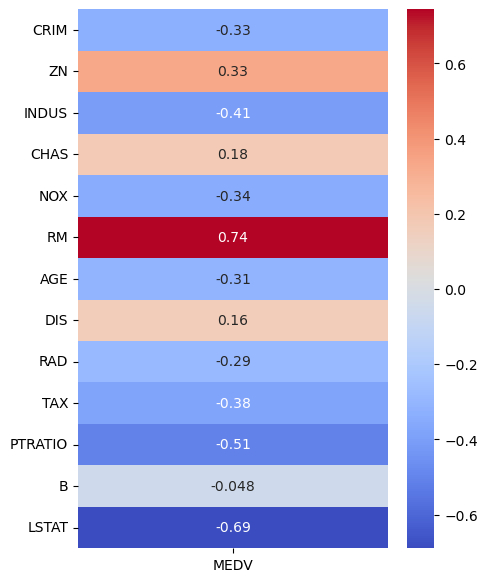

In [59]:
# Color-encoded correlation DataFrame with values in cells
plt.figure(figsize=(5, 7))
sns.heatmap(data=corr_df.loc[:'LSTAT',['MEDV']], annot=True, cmap='coolwarm')

In [85]:
# 
sort_corr = abs(corr_df['MEDV']).sort_values(ascending=False)[1:]
sort_corr

RM         0.744178
LSTAT      0.689682
PTRATIO    0.509432
INDUS      0.406312
TAX        0.376263
NOX        0.343677
ZN         0.334025
CRIM       0.332792
AGE        0.313334
RAD        0.286140
CHAS       0.178007
DIS        0.157172
B          0.048065
Name: MEDV, dtype: float64

Text(0.5, 1.0, 'Features Correlation with MEDV')

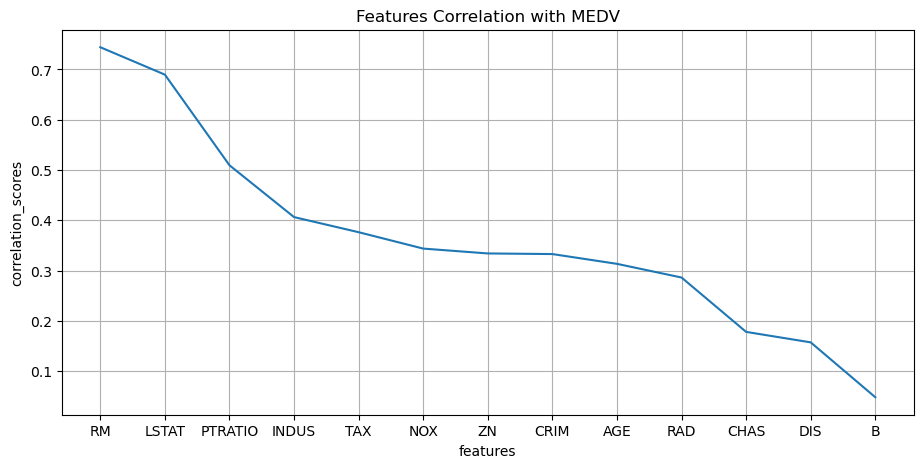

In [64]:
# 
plt.figure(figsize=(11, 5))
plt.plot(sort_corr)
plt.grid(True)
plt.xlabel('features')
plt.ylabel('correlation_scores')
plt.title('Features Correlation with MEDV')

From the above figure now we can clearly observe features that have a strong relationship with the housing price:
- `RM` - average number of rooms per dwelling - has a very strong correlation with the target variable and `LSTAT` - % lower status of the population - as well
- Followed by `PTRATIO` - pupil-teacher ratio by town - that has also a strong relationship with the target variable
- Then comes `INDUS` - proportion of non-retail business acres per town - with an acceptable relationship with the target variable
- The rest of the features have a weak relationship with the target

# 2. Maching Learning (ML) Model Building

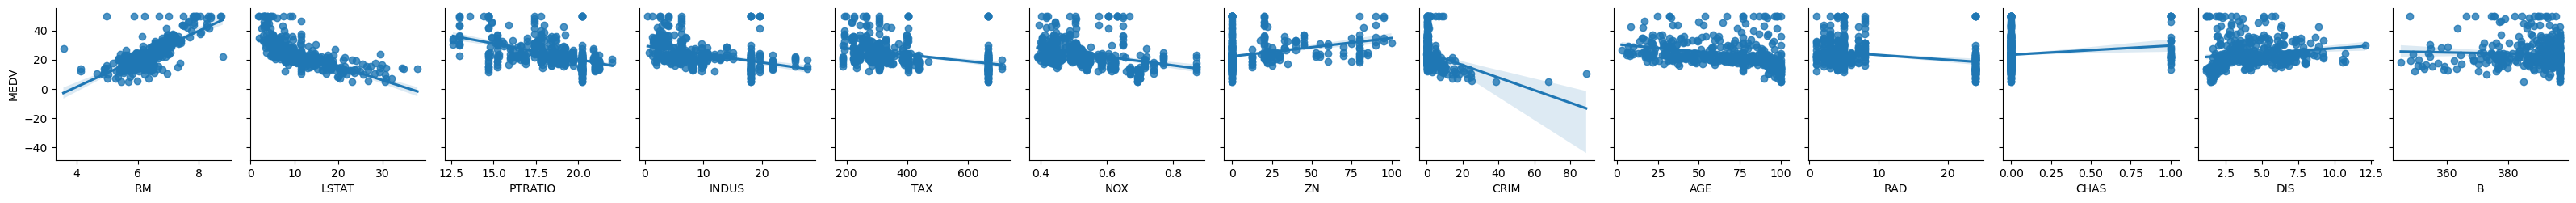

In [87]:
# 
sns.pairplot(
    data=imputed_wn_outl_df,
    x_vars=sort_corr.index.to_list(),
    y_vars=['MEDV'],
    kind='reg'
)

**What Type of Learning?**
- The records in our data are all labeled (meaning our data contains the target variable to which the features are mapped to, then helping our model to learn from both the features and the target variable), what means we have here a Supervised Learning case.

**What Task at hand?**
- The task we have here is to predict housing price (estimate the price) which falls into a Regression task.

**What Machine Learning Algorithms to use?**
- Our dataset variables are continuous variables.
- For a Supervised Learning with Regression task, we will choose our Machine Learning algorithm from Regression algorithms.
- From the above regression plot, we can observe a strong linear relationship between the other variables (independant variables) and the target variable (dependant variable) with data points mostly concentrated around the regression line.

<div class="alert alert-block alert-info">With all highlighted above, we will go for a <b>Linear Regression Model</b> as our model choice.</div>

In [66]:
# Importing the necessary class and function
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [67]:
imputed_wn_outl_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


In [71]:
# Splitting the dataset into to X and y
X = imputed_wn_outl_df.iloc[:,:-1]
y = imputed_wn_outl_df['MEDV']


In [73]:
# Splitting X and y into X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((429, 13), (300, 13), (129, 13), (300,), (129,))

In [82]:
# Defining the model
lr_model = LinearRegression()

# Fitting the model with the train dataset
lr_model.fit(X_train, y_train)

# Predicting with the test dataset
predictions = lr_model.predict(X_test)

# Displaying the predicted values and the actual values as a DataFrame
pd.DataFrame({'actual_price': y_test, 'predicted': predictions})

,actual_price,predicted
175,29.4,30.557713
182,37.9,32.490271
59,19.6,19.738749
464,21.4,18.916100
10,15.0,20.745884
...,...,...
8,16.5,14.455713
246,24.3,20.117552
243,23.7,28.372805
334,20.7,21.569328


The coefficient of determination (`R²`) is a statistical measure of how well a statistical model predicts an outcome.<br>
> It is a number between **0** and **1**, with __1__ being the best value.<br>
> A coefficient of determination of __0.70__ is generally considered **good**, while a coefficient of determination of **0.50** is considered __moderate__.

In [88]:
# Calculating the Coefficient of Determination (R^2) of our model
lr_model.score(X_test, y_test)

0.6162910477390049

The score of `0.61` is close to good, thus indicates that our model performed quite well but can still be improved

For improvement lot of actions can be done such as:
- dropping features with weak correlation with the target variable.
- hyperparameter tuning to find hyperparameters that yield best score.
- proceed to model selection by evaluating different models to choose what model scores the best.
- some features have a strong correlation between them, use Ridge Regression to address that issue (multicolinearity issue) by imposing a penalty so that it does not affect how the modell performs. Or use models that are not affected by the issue. Or run a dimensionality reduction on the dataset (Principal Component Analysis -PCA-) to transform the features into features that do not have strong correlation with the target variable.